In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# <font size="6">1. Khai báo tên file</font>

In [2]:
pulls_file_name = r'D:\projects\Python\BTL\raw_data\3000_pull_requests_data.json'
check_runs_file_name = r'D:\projects\Python\BTL\raw_data\check_runs_pulls.json'

# <font size="6">2. Mở dữ liệu</font>

<font size="4">2.1. Mở dữ liệu pulls</font>

In [3]:
with open(pulls_file_name, 'r', encoding='utf-8') as file:
    pulls_data = json.load(file)
pulls_df = pd.json_normalize(pulls_data)

<font size="4">2.1. Mở dữ liệu check-runs</font>

In [4]:
with open(check_runs_file_name, 'r', encoding='utf-8') as file:
    check_runs_data = json.load(file)
check_runs_df = pd.json_normalize(check_runs_data)

# <font size="6">3. Làm sạch dữ liệu và thêm cột thông tin check-runs vào DataFrame</font>

In [5]:
# Add num of check runs to dataframe
count_check_runs = pd.DataFrame(columns=['count_check_runs'])
count_check_runs['count_check_runs'] = check_runs_df['total_count']

#Add status columns to dataframe
status_df = pd.DataFrame(columns=['num_of_completed_checks', 'num_of_uncompleted_check',
            'num_of_success_check', 'num_of_failure_check', 'num_of_skiped_check', 'num_of_cancelled_check'])
for i in range(len(check_runs_df)):
    num_of_completed_checks, num_of_uncompleted_check = 0, 0
    num_of_success_check, num_of_failure_check, num_of_skipped_check, num_of_cancelled_check = 0, 0, 0, 0
    for j in range(len(check_runs_df.loc[i]['check_runs'])):
        if check_runs_df.loc[i]['check_runs'][j]['status'] == 'completed':
            num_of_completed_checks += 1
            if check_runs_df.loc[i]['check_runs'][j]['conclusion'] == 'success':
                num_of_success_check += 1
            elif check_runs_df.loc[i]['check_runs'][j]['conclusion'] == 'failure':
                num_of_failure_check += 1
            elif check_runs_df.loc[i]['check_runs'][j]['conclusion'] == 'skipped':
                num_of_skipped_check += 1
            elif check_runs_df.loc[i]['check_runs'][j]['conclusion'] == 'cancelled':
                num_of_cancelled_check += 1
        else:
            num_of_uncompleted_check += 1
    pass_all_check = True if num_of_failure_check == 0 else False
    new_row = pd.DataFrame({'num_of_completed_checks' : [num_of_completed_checks],
                            'num_of_uncompleted_check' : [num_of_uncompleted_check],
                            'num_of_success_check' : [num_of_success_check],
                            'num_of_failure_check' : [num_of_failure_check],
                            'num_of_skipped_check' : [num_of_skipped_check],
                            'num_of_cancelled_check' : [num_of_cancelled_check],
                            'pass_all_check' : pass_all_check})
    status_df = pd.concat([status_df, new_row], ignore_index=True)
pulls_df = pd.concat([pulls_df, status_df], axis = 1)
pulls_df = pulls_df[['url', 'user.login', 'created_at', 'closed_at', 'merged_at', 'state', 'title',
                     'num_of_completed_checks', 'num_of_uncompleted_check','num_of_success_check',
                    'num_of_failure_check', 'num_of_skipped_check', 'num_of_cancelled_check', 'pass_all_check']]


In [6]:
pulls_df

,url,user.login,created_at,closed_at,merged_at,state,title,num_of_completed_checks,num_of_uncompleted_check,num_of_success_check,num_of_failure_check,num_of_skipped_check,num_of_cancelled_check,pass_all_check
0,https://api.github.com/repos/pandas-dev/pandas...,tuhinsharma121,2024-06-05T15:42:36Z,2024-06-05T17:01:11Z,2024-06-05T17:01:11Z,closed,DOC: fix PR07 for pandas.merge_ordered,41,0,32,0,9.0,0,True
1,https://api.github.com/repos/pandas-dev/pandas...,tuhinsharma121,2024-06-05T15:36:50Z,2024-06-05T17:00:45Z,2024-06-05T17:00:45Z,closed,DOC: fix PR07 for pandas.pivot,41,0,32,0,9.0,0,True
2,https://api.github.com/repos/pandas-dev/pandas...,tuhinsharma121,2024-06-05T15:30:49Z,2024-06-05T17:00:12Z,2024-06-05T17:00:12Z,closed,DOC: fix SA01 for pandas.read_spss,41,0,32,0,9.0,0,True
3,https://api.github.com/repos/pandas-dev/pandas...,JJLLWW,2024-06-05T13:59:18Z,None,None,open,BUG : fix Series.mode throwing exception with ...,40,0,31,0,9.0,0,True
4,https://api.github.com/repos/pandas-dev/pandas...,sofiasimass,2024-06-05T12:34:09Z,None,None,open,ENH: Align Timedelta fractional Seconds (+ rep...,36,0,6,25,5.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,https://api.github.com/repos/pandas-dev/pandas...,MarcoGorelli,2023-08-03T10:18:48Z,2023-08-07T20:19:26Z,2023-08-07T20:19:26Z,closed,ENH: add consortium standard entrypoint,71,0,67,0,4.0,0,True
2996,https://api.github.com/repos/pandas-dev/pandas...,mroeschke,2023-08-03T01:58:32Z,2023-08-04T17:06:30Z,2023-08-04T17:06:30Z,closed,CLN: VariableOffsetWindowIndexer,33,0,29,0,4.0,0,True
2997,https://api.github.com/repos/pandas-dev/pandas...,mroeschke,2023-08-02T19:13:57Z,2023-08-03T16:18:52Z,2023-08-03T16:18:52Z,closed,TST: Use more pytest.importorskip,33,0,27,2,4.0,0,False
2998,https://api.github.com/repos/pandas-dev/pandas...,kesmit13,2023-08-02T18:18:12Z,2023-08-25T18:14:38Z,None,closed,Add DB-API 2.0 cursor support to pandas DataFr...,32,0,26,2,4.0,0,False


# <font size="6">4. Phân tích dữ liệu pulls</font>

<font size="4">4.1. Tỷ lệ pulls pass tất cả các test</font>

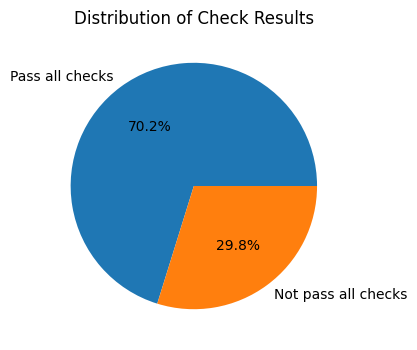

In [7]:
num_of_pass_all_check = len(pulls_df[pulls_df['pass_all_check'] == True])
sizes = [num_of_pass_all_check, len(pulls_df) - num_of_pass_all_check]
labels = ['Pass all checks', 'Not pass all checks']

plt.figure(figsize=(4, 4)) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('Distribution of Check Results')

plt.show()

<font size="4">4.2. Số lượng pulls chưa đóng</font>

In [8]:
num_of_open_pulls = len(pulls_df[pulls_df['state'] == 'open'])
num_of_open_pulls

102

<font size="4">4.3. Số lượng pulls đã đóng</font>

In [9]:
num_of_closed_pulls = len(pulls_df[pulls_df['state'] == 'closed'])
num_of_closed_pulls

2898

<font size="4">4.4. Số lượng pulls đã merged</font>

In [10]:
num_of_merged_pulls = len(pulls_df[pulls_df['merged_at'].isna() == False])
num_of_merged_pulls

2441

<font size="4">4.5. Tỷ lệ pulls đóng và chưa đóng</font>

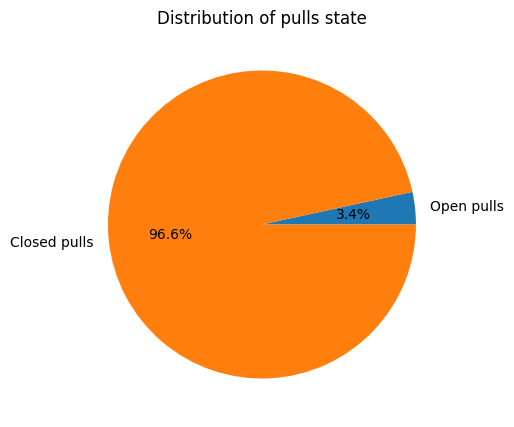

In [11]:
sizes = [num_of_open_pulls, num_of_closed_pulls]
labels = ['Open pulls', 'Closed pulls']

plt.figure(figsize=(5, 5)) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('Distribution of pulls state')

plt.show()

<font size="4">4.6. Tỷ lệ pull đã merged và chưa merged</font>

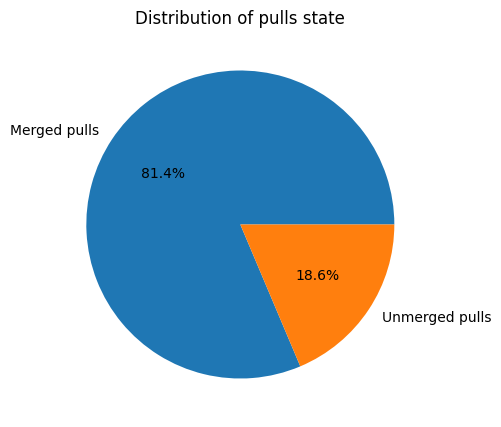

In [12]:
sizes = [num_of_merged_pulls, len(pulls_df) - num_of_merged_pulls]
labels = ['Merged pulls', 'Unmerged pulls']

plt.figure(figsize=(5, 5)) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('Distribution of pulls state')

plt.show()

<font size="4">4.7. Thời gian trung bình để merge 1 pull</font>

In [13]:

merged_pulls = pd.DataFrame(pulls_df[pulls_df['merged_at'].isna() == False])
merged_pulls.reset_index(drop = True, inplace = True)

time_for_merge_pull = []
cnt = 0
for i in range(len(merged_pulls)):
    merged_pull = merged_pulls.iloc[i]
    start_time = datetime.strptime(merged_pull['created_at'], '%Y-%m-%dT%H:%M:%SZ')
    end_time = datetime.strptime(merged_pull['merged_at'], '%Y-%m-%dT%H:%M:%SZ')
    time_for_merge_pull.append(round((end_time - start_time).seconds / 60))
time_for_merge_pull = pd.Series(time_for_merge_pull, name = 'time_for_merge_pull')
merged_pulls = pd.concat([merged_pulls, time_for_merge_pull], axis = 1)

merged_pulls['time_for_merge_pull'].describe()

count    2441.000000
mean      550.803359
std       453.306381
min         0.000000
25%       137.000000
50%       405.000000
75%       958.000000
max      1439.000000
Name: time_for_merge_pull, dtype: float64

<font size="4">4.8. Những người pull nhiều nhất</font>

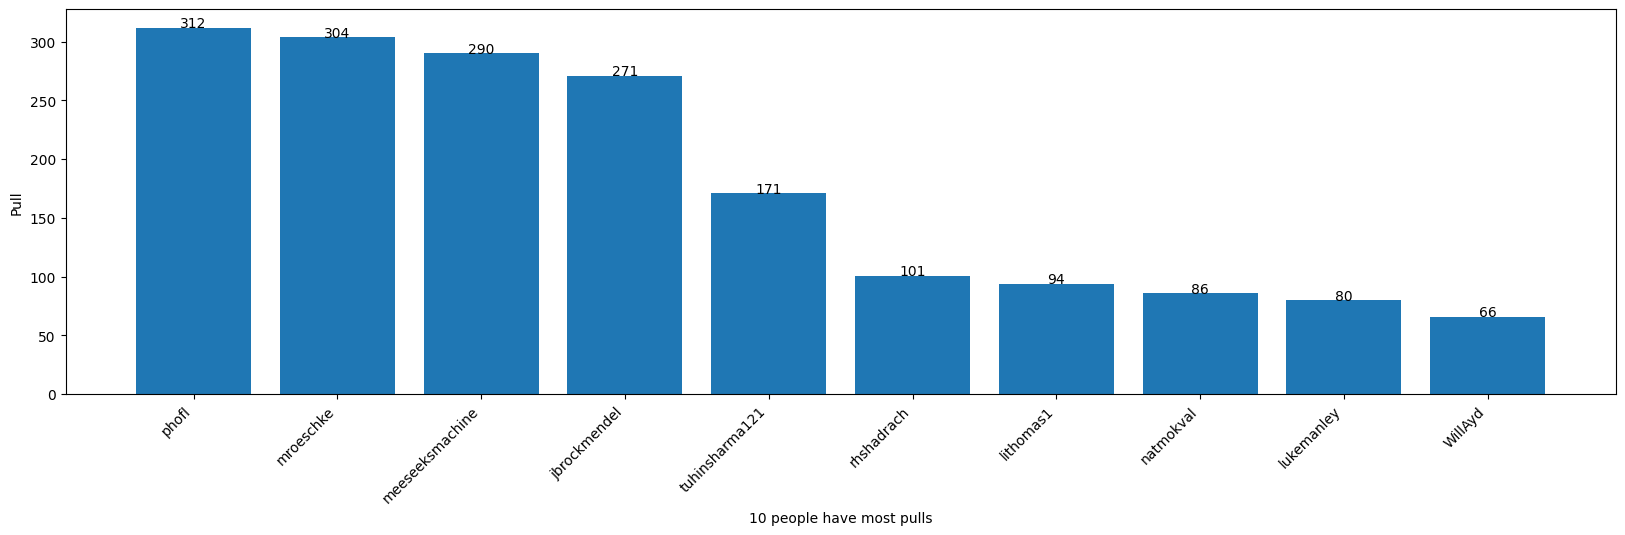

In [14]:
num_of_people = 10
people_have_the_most_pulls = pulls_df['user.login'].value_counts().head(num_of_people)

name = people_have_the_most_pulls.index
value = people_have_the_most_pulls.values

fig, ax = plt.subplots(figsize = (num_of_people * 2, 5))
ax.bar(name, value)
ax.set_xticks(name)
ax.set_xticklabels(name, rotation = 45, ha = 'right')
for i in range(num_of_people):
    plt.text(i, value[i] + 0.1, value[i], ha = 'center')
plt.ylabel('Pull')
plt.xlabel(f'{num_of_people} people have most pulls')
plt.show()


<font size="4">4.9. Những người merge nhiều nhất</font>

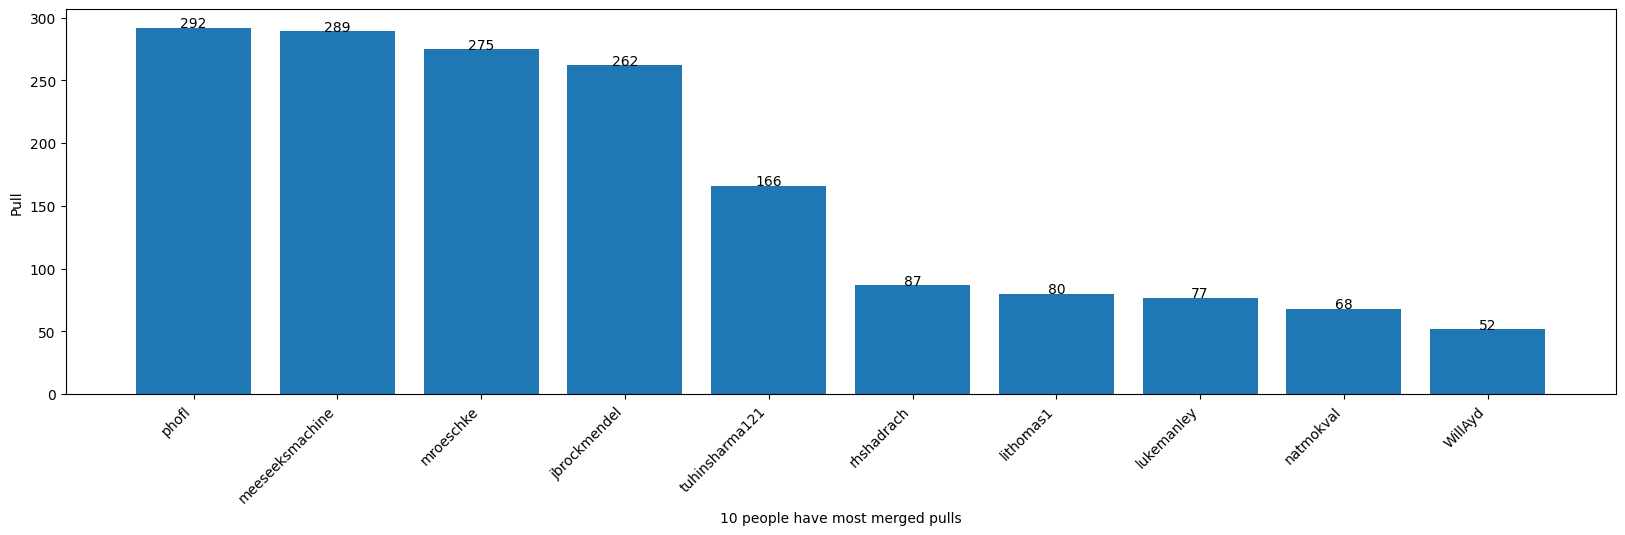

In [15]:
people_have_the_most_merged_pulls = merged_pulls['user.login'].value_counts().head(num_of_people)

name = people_have_the_most_merged_pulls.index
value = people_have_the_most_merged_pulls.values

fig, ax = plt.subplots(figsize = (num_of_people * 2, 5))
ax.bar(name, value)
ax.set_xticks(name)
ax.set_xticklabels(name, rotation = 45, ha = 'right')
for i in range(num_of_people):
    plt.text(i, value[i] + 0.1, value[i], ha = 'center')
plt.ylabel('Pull')
plt.xlabel(f'{num_of_people} people have most merged pulls')
plt.show()

<font size="4">4.10. Những người có tỷ lệ merge cao nhất</font>

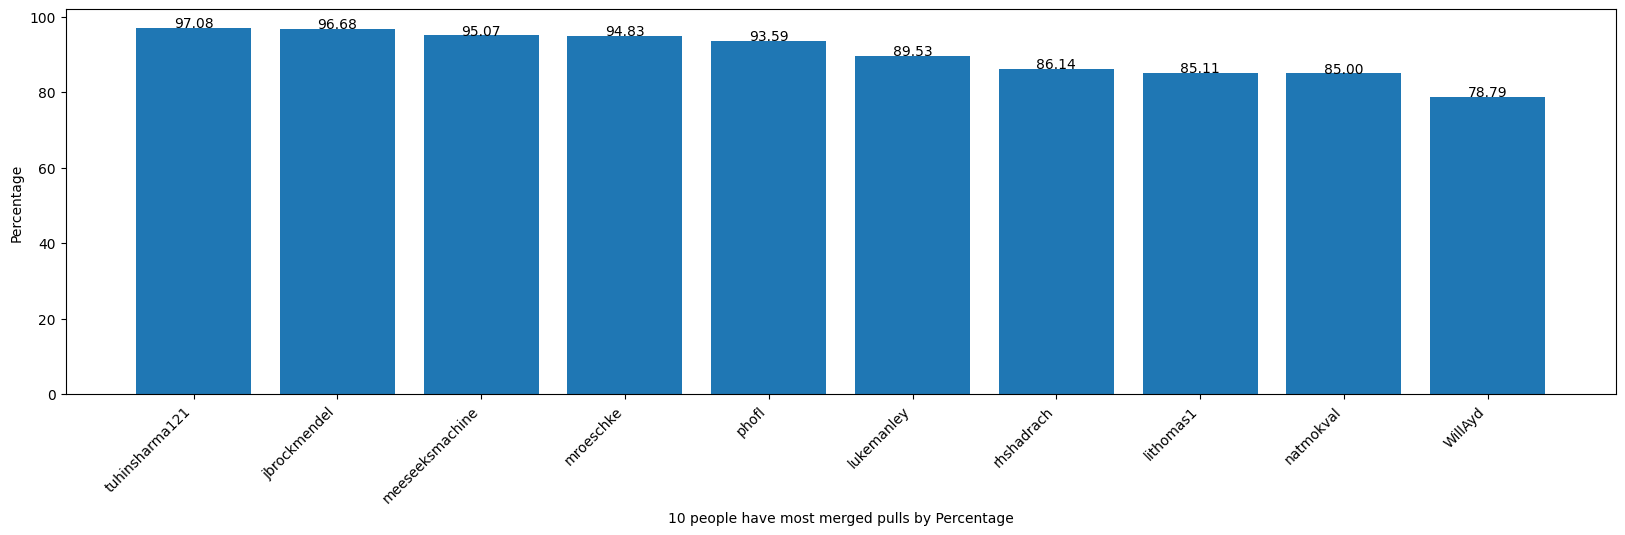

In [16]:
tmp_df = merged_pulls['user.login'].value_counts().head(num_of_people)

tmp_name = tmp_df.index
tmp_value = tmp_df.values / people_have_the_most_pulls.values * 100

people_have_the_most_merged_pulls_by_per = pd.Series(tmp_value, index=tmp_name)
people_have_the_most_merged_pulls_by_per.sort_values(ascending=False, inplace=True)

name = people_have_the_most_merged_pulls_by_per.index
value = people_have_the_most_merged_pulls_by_per.values

fig, ax = plt.subplots(figsize = (num_of_people * 2, 5))
ax.bar(name, value)
ax.set_xticks(name)
ax.set_xticklabels(name, rotation = 45, ha = 'right')
for i in range(num_of_people):
    plt.text(i, value[i] + 0.1, f'{value[i]:.2f}', ha = 'center')
plt.ylabel('Percentage')
plt.xlabel(f'{num_of_people} people have most merged pulls by Percentage')
plt.show()

<font size="4">4.10. Những người có tỷ lệ pass all check cao nhất</font>

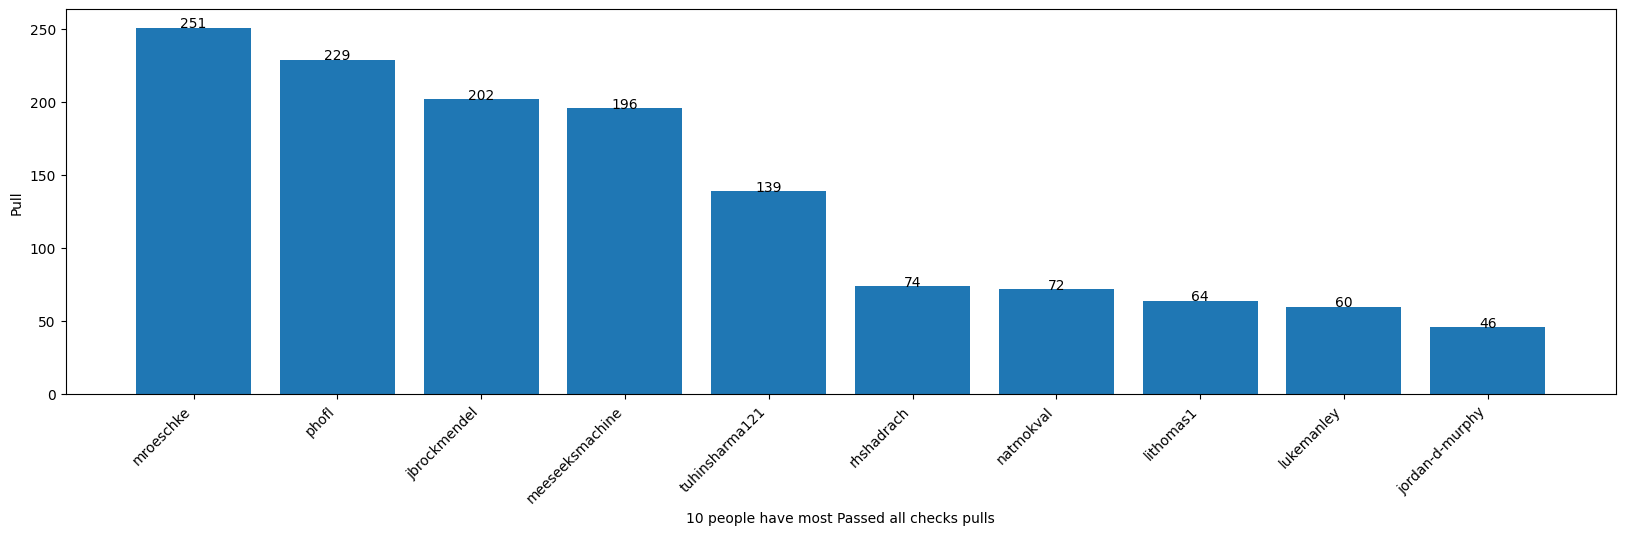

In [17]:
people_have_the_most_passed_pulls = pulls_df[pulls_df['pass_all_check'] == True]['user.login'].value_counts().head(num_of_people)

name = people_have_the_most_passed_pulls.index
value = people_have_the_most_passed_pulls.values

fig, ax = plt.subplots(figsize = (num_of_people * 2, 5))
ax.bar(name, value)
ax.set_xticks(name)
ax.set_xticklabels(name, rotation = 45, ha = 'right')
for i in range(num_of_people):
    plt.text(i, value[i] + 0.1, value[i], ha = 'center')
plt.ylabel('Pull')
plt.xlabel(f'{num_of_people} people have most Passed all checks pulls')
plt.show()

<font size="4">4.11. Những từ xuất hiện nhiều nhất trong các title</font>

In [18]:
words = [x.split()[0] for x in pulls_df['title']]
words_with_no_duplication = pd.DataFrame(list({x:words.count(x)for x in words}.items()), columns = ['Words', 'Time'] )
words_with_no_duplication.sort_values(by = 'Time', ascending = False, inplace = True, ignore_index = True)
words_with_no_duplication.head()

,Words,Time
0,DOC:,548
1,Backport,347
2,BUG:,331
3,DEPR:,143
4,CLN:,138


<font size="4">4.12. Số lượng pull được tạo ra mỗi tháng từ 8/2023 đến nay</font>

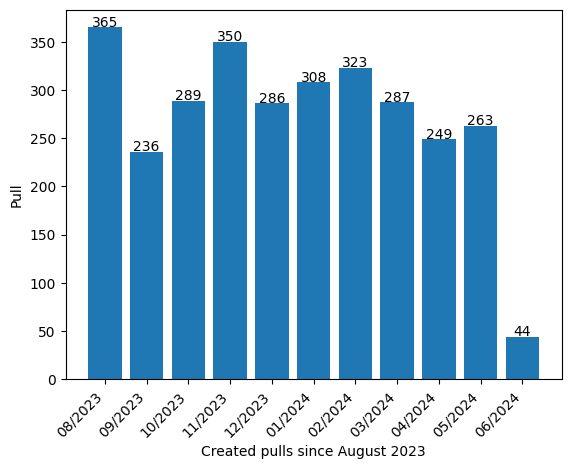

In [19]:
months = []
for year in range(2023, 2025):
    for month in range(1, 13):
        if year == 2023 and month < 8:
            continue
        if year == 2024 and month > 6:
            break
        months.append(f"{month:02d}/{year}")
        
month_series = pd.Series(index = months)
for month in months:
    month_search = datetime.strftime(datetime.strptime(month, '%m/%Y'), '%Y-%m')
    month_mask = pulls_df['created_at'].str.contains(month_search)
    month_series[month] = len(pulls_df[month_mask])    

name = month_series.index
value = month_series.values

fig, ax = plt.subplots()
ax.bar(name, value)
ax.set_xticks(name)
ax.set_xticklabels(name, rotation = 45, ha = 'right')
for i in range(len(months)):
    plt.text(i, value[i] + 1, int(value[i]), ha = 'center')
plt.ylabel('Pull')
plt.xlabel('Created pulls since August 2023')
plt.show()

<font size="4">4.13. Số lượng pull được merge ra mỗi tháng từ 8/2023 đến nay</font>

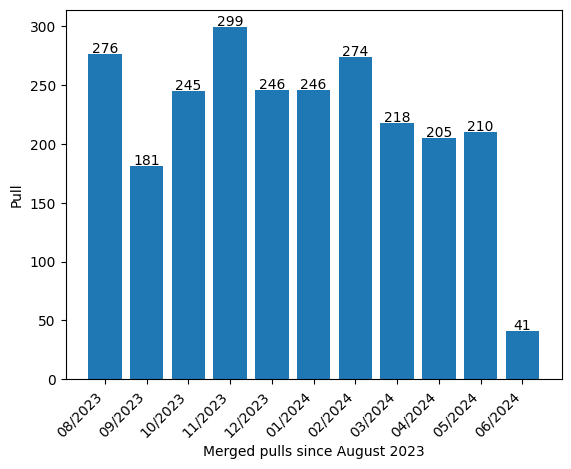

In [20]:
months = []
for year in range(2023, 2025):
    for month in range(1, 13):
        if year == 2023 and month < 8:
            continue
        if year == 2024 and month > 6:
            break
        months.append(f"{month:02d}/{year}")
        
month_series = pd.Series(index = months)
for month in months:
    month_search = datetime.strftime(datetime.strptime(month, '%m/%Y'), '%Y-%m')
    month_mask = merged_pulls['merged_at'].str.contains(month_search)
    month_series[month] = len(merged_pulls[month_mask])    

name = month_series.index
value = month_series.values

fig, ax = plt.subplots()
ax.bar(name, value)
ax.set_xticks(name)
ax.set_xticklabels(name, rotation = 45, ha = 'right')
for i in range(len(months)):
    plt.text(i, value[i] + 1, int(value[i]), ha = 'center')
plt.ylabel('Pull')
plt.xlabel('Merged pulls since August 2023')
plt.show()

<font size="4">4.14. Merged pulls mỗi tháng của một contributor</font>

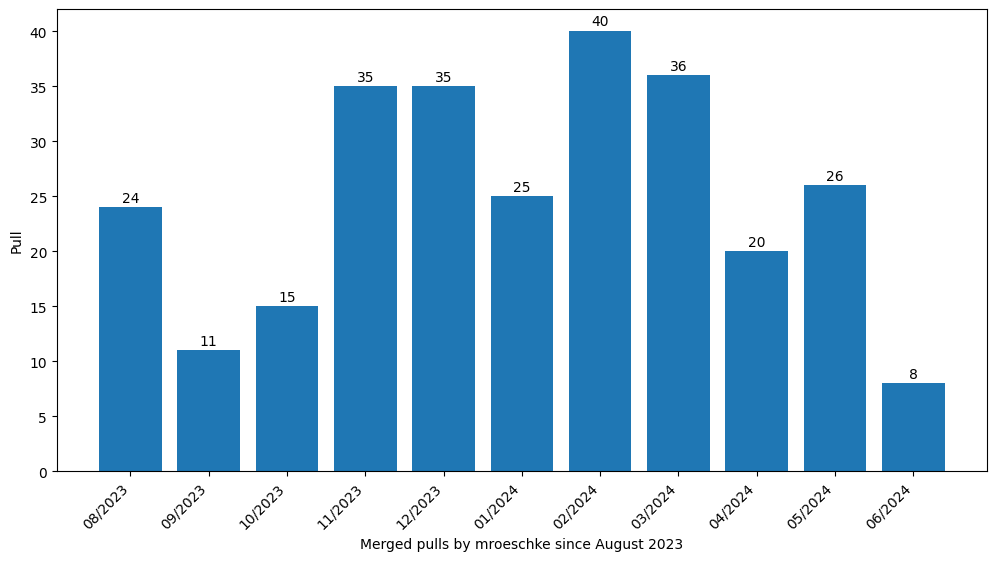

In [21]:
#  Merged pulls mỗi tháng của 1 contributor
months = []
contributor_name = 'mroeschke'
for year in range(2023, 2025):
    for month in range(1, 13):
        if year == 2023 and month < 8:
            continue
        if year == 2024 and month > 6:
            break
        months.append(f"{month:02d}/{year}")        
month_series = pd.Series(index = months)

name_mask = merged_pulls['user.login'] == contributor_name
merged_pulls_by_a_specific_contributor = merged_pulls[name_mask]

for month in months:
    month_search = datetime.strftime(datetime.strptime(month, '%m/%Y'), '%Y-%m')
    month_mask = merged_pulls_by_a_specific_contributor['merged_at'].str.contains(month_search)
    month_series[month] = len(merged_pulls_by_a_specific_contributor[month_mask])    

name = month_series.index
value = month_series.values
x = np.arange(len(months))

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar( name, value)
ax.set_xticks(name)
ax.set_xticklabels(name, rotation = 45, ha = 'right')
for i in range(len(months)):
    plt.text(i, int(value[i]) + 0.5, int(value[i]), ha = 'center')
plt.ylabel('Pull')
plt.xlabel(f'Merged pulls by {contributor_name} since August 2023')
plt.show()